In [6]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import random
import math

In [89]:
# number of states
n = 10
num_states = n
total_num_states = n**4
# maximum velue of position , velocity and angle

max_pos = 4.8
max_vel = 3
max_ang = 0.418
max_values =[max_pos, max_vel ,max_ang]

# granuity of each respective values
gran_pos = (2*max_values[0])/num_states
gran_vel = (2*max_values[1])/num_states
gran_ang = (2*max_values[2])/num_states


gran = [gran_pos, gran_vel, gran_ang]


states = {'pos' : [],'vel' : [], 'ang': []}

# making the states to numbered stated list
for i in range(n+1):
    states['pos'].append(-max_values[0] + i*gran[0])
    states['vel'].append(-max_values[1]+i*gran[1])
    states['ang'].append(-max_values[2]+i*gran[2])


In [107]:


class td_lambda:
    def __init__(self,num_states,num_actions,episodes,alpha,gamma,epsilon,lamda,states):
        self.episodes = episodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lamda = lamda
        self.Q = np.zeros((num_states,num_actions))
        self.E = np.zeros((num_states,num_actions))
        self.num_states = num_states
        self.num_actions = num_actions
    def granualise(self,state):
        # comparing the current state and the numbered list

        for i in range(num_states):
            if state[0] < states['pos'][i]:
                state[0] = int(i-1)
                break

        for i in range(num_states):
            if state[1] < states['vel'][i]:
                state[1] = int(i-1)
                break

        for i in range(num_states):
            if state[2] < states['ang'][i]:
                state[2] = int(i-1)
                break

        for i in range(num_states):
            if state[3] < states['vel'][i]:
                state[3] = int(i-1)
                break
        return int(state[0]*(n**3)+state[1]*(n**2)+state[2]*(n**1)+state[3]*(n**0))

    def chose_action(self,state):
        if np.random.uniform(0,1) < self.epsilon:
            action = env.action_space.sample()

        elif np.max(self.Q[state])>0:
            action = np.argmax(self.Q[state])
        else:
            action = env.action_space.sample()
        return action
        
    def update(self,state, action, reward, next_state):
        delta = reward + self.gamma*(max(self.Q[next_state])) - self.Q[state,action]
        self.E[state,action] += 1

        self.Q += self.alpha*delta*self.E
        self.E = self.gamma*self.lamda*self.E

            
    
    def train(self,env):
        states_visited = []
        rewards = []
        for epi in range(self.episodes):
            state = env.reset()[0]
            state = self.granualise(state)
            done = False
            reward_per_epi = 0
            self.E = np.zeros((self.num_states,self.num_actions))
            while not done:
                #chose action
                action = self.chose_action(state)
                
                #take the action
                new_state,reward,terminated,truncated,info = env.step(action)
                reward_per_epi += reward
                new_state = self.granualise(new_state)
                done = truncated or terminated
                
                #update Q
                self.update(state,action,reward,new_state)
                states_visited.append(state)
                
                #update the state
                state = new_state

            rewards.append(reward_per_epi)
            
        return (rewards,states_visited)
                
    




In [152]:
env = gym.make("CartPole-v1")
env.reset()
env.render()


#hyperparameters
episodes = 3000
alpha = 0.9 #learning rate
gamma = 1 #discount factor
epsilon = 0.05 #Exploration factor
lamda = 0.9 #td(lamda)
# states

# num of states = total_num_states
num_actions = 2




outcomes = []
rewards_list = []
#Moving through episodes
timestep_list = []
success = 0
failure = 0



agent = td_lambda(total_num_states,num_actions,episodes,alpha,gamma,epsilon,lamda,states)

(rewards,states_visited) = agent.train(env)

print("traning done")
print("after training")
print(agent.Q)
env.close()
        




    
    
        

traning done
after training
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [153]:
i = agent.Q != 0
x = []
for item in agent.Q:
    if item[0] != 0 or item[1] != 0:
        x.append(item)
print(len(x))
print(len(agent.Q))

294
10000


In [154]:
states_visted = np.array(states_visited)
i = states_visted != 0
print(len(np.unique(states_visited)))
print(len(states_visited))

294
59099


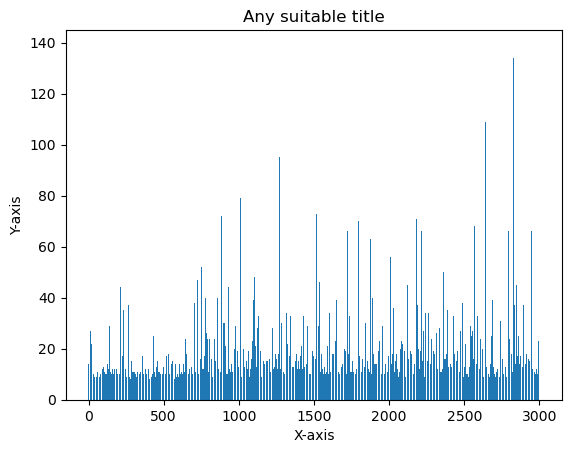

In [155]:
x = np.arange(episodes)
y = rewards
  
plt.bar(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Any suitable title")
plt.show()


In [67]:
count = 0
for item in outcomes:
    if item == 'Failure':
        count += 1
print(count)

1000


In [105]:
env = gym.make("CartPole-v1")
env.reset()
env.render()
print(env.action_space.sample())

0


In [323]:
for i in range(4,0,-1):
    print(i-1)


3
2
1
0


In [365]:
np.max(rewards_list)

500.0

In [383]:
print(np.max(value_func))
count = 0
for item in value_func:
    if np.max(item) != 0:
        count += 1
print(count)

9.999999999243464
56


In [ ]:
    if done:
        Q_n = rewards
    else:
        action = chose_action(new_state) 

        Q_n =rewards+(gamma)*value_func[new_state,action]
    Q.append(Q_n)
    # calculate G
    for i in range(len(Q)):
        if i == (len(Q)-1):
            G += (lamda**i)*Q[i]
        else:
            G += (1-lamda)*(lamda**i)*Q[i]
    #update the value function  
        